# Análisis de la Movilidad en Bogotá

¿Cuáles son las rutas más críticas de movilidad y sus características en la ciudad de Bogotá?

Se toman los datos de la plataforma:
https://datos.movilidadbogota.gov.co

In [1]:
import pandas as pd
import os

In [2]:
os.chdir('../data_raw')

In [3]:
data_file_list = !ls

In [4]:
data_file_list

['Velocidades_Bitcarrier_Diciembre_2019.csv',
 'Velocidades_Bitcarrier_Junio_2019.csv',
 'Velocidades_Bitcarrier_Marzo_2019.csv',
 'Velocidades_Bitcarrier_Septiembre_2019.csv']

In [5]:
data_file_list[len(data_file_list)-1]

'Velocidades_Bitcarrier_Septiembre_2019.csv'

La adquisición de datos será de 4 meses del año 2019 con el propósito de optimizar espacio de almacenamiento y cargas de procesamiento.

In [6]:
''' Función df_builder
Recibe como parámetro de entrada una lista de archivos CSV,
hace la lectura y concatena los dataframes, siendo esta concatenación el retorno.
Los datos en los archivos CSV deben tener la misma estructura.
'''
def df_builder(data_list):
    n_files = len(data_list) - 1
    df_full = pd.read_csv(data_list[n_files])
    
    for i in range(n_files):
        df_i = pd.read_csv(data_list[i])
        df_full = pd.concat([df_full, df_i])
    
    return df_full

In [7]:
df_mov = df_builder(data_file_list)

In [8]:
df_mov.shape

(8544710, 22)

In [9]:
df_mov.describe

<bound method NDFrame.describe of          OBJECTID      TID                  INICIO                     FIN  \
0          537921  1001007  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
1          537922  1002040  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
2          537923  1000051  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
3          537924  1002038  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
4          537925  1001009  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
...           ...      ...                     ...                     ...   
2165215   2166123      116  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165216   2166124  1000076  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165217   2166125      115  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165218   2166126  1000078  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165219   2166127  1000077  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   

          AÑO  HORA  DISTANCE

In [10]:
df_mov.dtypes

OBJECTID                 int64
TID                      int64
INICIO                  object
FIN                     object
AÑO                      int64
HORA                     int64
DISTANCE                 int64
TYPE                     int64
VEL_PROMEDIO           float64
CUARTO_HORA             object
DIA_SEMANA              object
MES                     object
NAME_FROM               object
NAME_TO                 object
CODIGO                 float64
COEF_BRT               float64
COEF_MIXTO             float64
VEL_MEDIA_BRT          float64
VEL_MEDIA_MIXTO        float64
VEL_MEDIA_PONDERADA    float64
VEL_PONDERADA          float64
SHAPELEN               float64
dtype: object

In [11]:
## Limpieza de datos
# Verificación que todos los registros correspondan con el año de estudio: 2019
df_mov['AÑO'].value_counts()

2019    7471729
2020    1072981
Name: AÑO, dtype: int64

Dentro de los datasets obtenidos se encuentran datos de otros años.
Vamos a eliminar los registros del año 2020.

In [12]:
df_mov.shape # Tamaño original

(8544710, 22)

In [13]:
## Borrar los renglones cuando el AÑO es igual que 2020
df_mov = df_mov.loc[df_mov['AÑO'] == 2019]

In [14]:
df_mov['AÑO'].value_counts() # Verificación 

2019    7471729
Name: AÑO, dtype: int64

In [15]:
df_mov.shape # Tamaño final del dataframe

(7471729, 22)

### Columnas sin datos

Vamos a verificar las columnas que no tienen datos (Nan), posterior las eliminamos para tener un dataset más limpio.

In [17]:
df_mov['CODIGO'].value_counts()

Series([], Name: CODIGO, dtype: int64)

In [18]:
df_mov['COEF_BRT'].value_counts()

Series([], Name: COEF_BRT, dtype: int64)

In [19]:
df_mov['COEF_MIXTO'].value_counts()

Series([], Name: COEF_MIXTO, dtype: int64)

In [20]:
df_mov['VEL_MEDIA_BRT'].value_counts()

Series([], Name: VEL_MEDIA_BRT, dtype: int64)

In [21]:
df_mov['VEL_MEDIA_MIXTO'].value_counts()

Series([], Name: VEL_MEDIA_MIXTO, dtype: int64)

In [22]:
df_mov['VEL_MEDIA_PONDERADA'].value_counts()

Series([], Name: VEL_MEDIA_PONDERADA, dtype: int64)

In [23]:
df_mov['VEL_PONDERADA'].value_counts()

Series([], Name: VEL_PONDERADA, dtype: int64)

In [24]:
## Borrar las columnas
df_mov = df_mov.drop(labels=['CODIGO', 'COEF_BRT', 'COEF_MIXTO', 'VEL_MEDIA_BRT',
                            'VEL_MEDIA_MIXTO', 'VEL_MEDIA_PONDERADA', 'VEL_PONDERADA'], axis=1)

In [25]:
df_mov.describe

<bound method NDFrame.describe of          OBJECTID      TID                  INICIO                     FIN  \
0          537921  1001007  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
1          537922  1002040  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
2          537923  1000051  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
3          537924  1002038  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
4          537925  1001009  2019/09/06 07:00:00+00  2019/09/06 07:15:00+00   
...           ...      ...                     ...                     ...   
2165215   2166123      116  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165216   2166124  1000076  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165217   2166125      115  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165218   2166126  1000078  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   
2165219   2166127  1000077  2019/03/31 23:45:00+00  2019/04/01 00:00:00+00   

          AÑO  HORA  DISTANCE

In [26]:
df_mov.columns

Index(['OBJECTID', 'TID', 'INICIO', 'FIN', 'AÑO', 'HORA', 'DISTANCE', 'TYPE',
       'VEL_PROMEDIO', 'CUARTO_HORA', 'DIA_SEMANA', 'MES', 'NAME_FROM',
       'NAME_TO', 'SHAPELEN'],
      dtype='object')

In [27]:
df_mov.to_csv('../notebook/data/data_Mov_Bogota_2019.csv', index=None)

## Análisis Unidimensional de las Variables

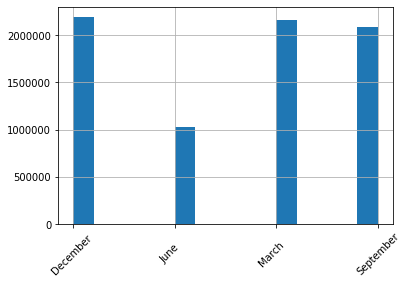

In [28]:
## Conteo de la ocurrencia de una variable y un valor

# Conteo de la movilidad en cada mes
df_mov_sorted = df_mov.sort_values('MES')
df_mov_sorted['MES'].hist(bins=15, xrot=45, grid=True)
##plt.xticks(rotation=45)

In [29]:
df_mov['DIA_SEMANA'].value_counts(normalize=True)

Domingo      0.159293
Sabado       0.150467
Lunes        0.149095
Viernes      0.141789
Martes       0.141059
Jueves       0.130548
Miercoles    0.127749
Name: DIA_SEMANA, dtype: float64

In [30]:
df_mov['NAME_FROM'].value_counts()

KR7           417858
NQS           358812
KR72          299708
AV.CARACAS    298871
AV.P.MAYO     290467
               ...  
K15             7972
CL153           5851
KR68SUR         5842
KR19C           5783
KR27;TV28       5286
Name: NAME_FROM, Length: 105, dtype: int64

In [31]:
df_mov['NAME_TO'].value_counts()

AV.CARACAS;KR7               67004
KR7;KR11                     59224
KR11;KR7                     51231
KR15;KR11                    50929
KR7;AV.CARACAS               50090
                             ...  
AV.PRIMERO_MAYO;DIAG48SUR     2118
CL77;CL85                     1756
CL57BSUR;CL71ASUR             1724
CL71ASUR;TV79D                1723
TV79D;KR91                      61
Name: NAME_TO, Length: 696, dtype: int64

In [32]:
df_mov

,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,SHAPELEN
0,537921,1001007,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1068,1,29.920095,07:00:00,Viernes,September,CL24,KR68B;KR60,NaN
1,537922,1002040,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1396,1,44.768136,07:00:00,Viernes,September,CL26,KR66A;AV.ROJAS,NaN
2,537923,1000051,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1458,1,16.267973,07:00:00,Viernes,September,CL116,KR15;KR11,NaN
3,537924,1002038,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,506,1,52.683532,07:00:00,Viernes,September,CL26,GOBERNACION;CAN,NaN
4,537925,1001009,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,732,1,9.281605,07:00:00,Viernes,September,CL63,KR77A;KR72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165215,2166123,116,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,3015,0,36.163350,23:45:00,Domingo,March,"TV42,KR50",CL6;CL33SUR,NaN
2165216,2166124,1000076,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,432,1,27.221366,23:45:00,Domingo,March,CL100,KR19;KR15,NaN
2165217,2166125,115,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,481,0,32.066666,23:45:00,Domingo,March,KR60;CL68,CL66C;KR58,NaN
2165218,2166126,1000078,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,976,1,42.940288,23:45:00,Domingo,March,CL100,KR19;KR49,NaN


## Análisis Multidimensional de las Variables

Velocidad promedio versus la trayectoria realizada.

La trayectoria se va a definir como la concatenación entre NAME_FROM y NAME_TO.

In [33]:
df_mov['TRAYEC'] = df_mov['NAME_FROM'] + ' - ' +df_mov['NAME_TO']

In [34]:
df_mov['TRAYEC'].value_counts()

KR6 - AV.P.MAYO;CL10ASUR     20391
AV.AMERICAS - KR74;KR80      20369
CL1,KR27 - KR25;AV.P.MAYO    20342
KR27,CL1 - AV.P.MAYO;KR25    20302
CL1,CL1B - KR25;KR27         20293
                             ...  
CL85 - KR11;KR15              1745
KR86 - CL57BSUR;CL71ASUR      1724
KR86 - CL71ASUR;TV79D         1723
KR15 - CL85;CL92              1519
KR86 - TV79D;KR91               61
Name: TRAYEC, Length: 816, dtype: int64

Mediana de la velocidad promedio en cada trayecto. VEL_PROMEDIO que es más común en cada trayecto:

In [35]:
medianVel_Tray = df_mov.groupby('TRAYEC').median()['VEL_PROMEDIO']
medianVel_Tray

TRAYEC
AUTONORTE - ALCALA;CL146               48.393858
AUTONORTE - ALCALA;PRADO               51.599929
AUTONORTE - CARDIO.INFANTIL;CL146      53.229107
AUTONORTE - CARDIO.INFANTIL;TOBERIN    44.079453
AUTONORTE - CL100;PEPE.SIERRA          41.504997
                                         ...    
TV42 - CL6;CL2C                        28.614078
TV42,KR50 - CL6;CL33SUR                25.904535
TV80A - AV.AMERICAS;KR80               16.566553
TV85,CL64BBIS - CL63;KR86              18.497270
TV85,CL65BIS,KR85J - CL63;KR86         15.585936
Name: VEL_PROMEDIO, Length: 816, dtype: float64

## Análisis de Texto

In [36]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [37]:
list_lite_NAME_TO = df_mov['NAME_TO'].value_counts().sort_values(ascending=False).index[0:10]
list_lite_NAME_TO

Index(['AV.CARACAS;KR7', 'KR7;KR11', 'KR11;KR7', 'KR15;KR11', 'KR7;AV.CARACAS',
       'KR11;KR15', 'KR15;KR19', 'KR19;KR15', 'KR10;AV.CARACAS',
       'AV.CARACAS;KR10'],
      dtype='object')

In [38]:
df_mov_filter_lite_NAME_TO = df_mov[df_mov['NAME_TO'].isin(list_lite_NAME_TO)]
df_mov_filter_lite_NAME_TO

,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,SHAPELEN,TRAYEC
2,537923,1000051,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1458,1,16.267973,07:00:00,Viernes,September,CL116,KR15;KR11,NaN,CL116 - KR15;KR11
18,537939,1000069,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,526,1,30.151908,07:00:00,Viernes,September,CL92,KR11;KR15,NaN,CL92 - KR11;KR15
26,537947,1000067,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,527,1,25.910706,07:00:00,Viernes,September,CL94,KR11;KR15,NaN,CL94 - KR11;KR15
30,537951,1000029,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,455,1,20.228330,07:00:00,Viernes,September,CL72,KR7;KR11,NaN,CL72 - KR7;KR11
34,537955,1000068,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,528,1,8.352791,07:00:00,Viernes,September,CL94,KR15;KR11,NaN,CL94 - KR15;KR11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165108,2166016,1000668,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,1027,1,38.194274,23:45:00,Domingo,March,AV.P.MAYO,KR10;AV.CARACAS,NaN,AV.P.MAYO - KR10;AV.CARACAS
2165139,2166047,1000233,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,427,1,42.664199,23:45:00,Domingo,March,CL134,KR15;KR19,NaN,CL134 - KR15;KR19
2165144,2166052,1000667,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,1032,1,48.377521,23:45:00,Domingo,March,AV.P.MAYO,AV.CARACAS;KR10,NaN,AV.P.MAYO - AV.CARACAS;KR10
2165179,2166087,1000221,2019/03/31 23:45:00+00,2019/04/01 00:00:00+00,2019,23,462,1,38.184331,23:45:00,Domingo,March,CL147,KR15;KR19,NaN,CL147 - KR15;KR19


In [39]:
textos_destino = ''
for row in df_mov_filter_lite_NAME_TO['NAME_TO']:
    textos_destino = textos_destino + ' ' + row

In [40]:
## to check the ModuleNotFoundError: No module named 'wordcloud'
## install:
## /anaconda3/bin/python -m pip install wordcloud
import sys
print(sys.executable)

/home/ivan/anaconda3/bin/python


In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

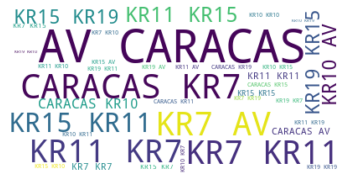

In [42]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_destino)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()